# Wildfire 2025 in California

On January 7, 2025, a significant wildfire ignited close to Los Angeles, California, and continues to blaze. Named the Palisades Fire and Eaton Fire, these fires spread rapidly fueled by strong winds and dry weather.

### Datasource
* The data was acquired through https://gis.data.cnra.ca.gov/datasets/CALFIRE-Forestry::ca-perimeters-nifc-firis-public-view

In [ ]:
import os
import numpy as np
import pandas as pd
import random
import folium
from folium import plugins
from folium.plugins import TimeSliderChoropleth

import seaborn as sns
import cv2
import matplotlib.pyplot as plt
import IPython
import time
import plotly.express as px
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from branca.colormap import linear

import geopandas as gpd

### Wildfires reported since 2025/01/07

In [ ]:
data0=pd.read_csv('/kaggle/input/earthquake-in-japan/CA_Perimeters_NIFC_FIRIS_public_view.csv')
data=data0[-30:].reset_index(drop=True)
print(data.columns.tolist())
display(data[0:1].T)

['OBJECTID', 'GlobalID', 'type', 'source', 'poly_DateCurrent', 'mission', 'incident_name', 'incident_number', 'area_acres', 'description', 'FireDiscoveryDate', 'CreationDate', 'EditDate', 'displayStatus']


,0
OBJECTID,1262
GlobalID,7ee0ab36-f6af-4ca9-96ed-170ebc0b0ba0
type,Heat Perimeter
source,FIRIS
poly_DateCurrent,2025/01/07 22:11:19.142+00
mission,CA-LFD-PALISADES-N57B
incident_name,NaN
incident_number,NaN
area_acres,771.572356
description,FIRIS Perimeter


In [ ]:
# Load GeoJSON file
geo_data0 = gpd.read_file('/kaggle/input/earthquake-in-japan/CA_Perimeters_NIFC_FIRIS_public_view.geojson')
geo_data=geo_data0[-30:].reset_index(drop=True)
print(geo_data.columns)
display(geo_data[0:1].T)
#print(geo_data.loc[0,'geometry'])
ids=geo_data[['geometry']].drop_duplicates().index.tolist()
print(ids)
geo_data = geo_data[geo_data.index.isin(ids)].reset_index(drop=True)
print(len(geo_data))

Index(['OBJECTID', 'GlobalID', 'type', 'source', 'poly_DateCurrent', 'mission',
       'incident_name', 'incident_number', 'area_acres', 'description',
       'FireDiscoveryDate', 'CreationDate', 'EditDate', 'displayStatus',
       'geometry'],
      dtype='object')


,0
OBJECTID,1262
GlobalID,7ee0ab36-f6af-4ca9-96ed-170ebc0b0ba0
type,Heat Perimeter
source,FIRIS
poly_DateCurrent,2025-01-07T22:11:19.142000+00:00
mission,CA-LFD-PALISADES-N57B
incident_name,None
incident_number,None
area_acres,771.572356
description,FIRIS Perimeter


[0, 1, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
27


In [ ]:
map_center = [geo_data.geometry.centroid.y.mean(), geo_data.geometry.centroid.x.mean()]
eq_map = folium.Map(location=map_center, tiles='OpenStreetMap', zoom_start=10.0, min_zoom=2.0)
#'Stamen Terrain','OpenStreetMap'

for i in range(len(geo_data)):
    polygon = geo_data['geometry'][i]
    if polygon.geom_type == 'MultiPolygon':
        # For MultiPolygon, iterate through each polygon
        for single_polygon in polygon.geoms:
            folium.Polygon(
                locations=[(lat, lon) for lon, lat in single_polygon.exterior.coords],
                color='red',           # Red boundary color
                fill=True,             # Fill the polygon
                fill_color='red',      # Red fill color
                fill_opacity=0.2       # Set fill opacity
            ).add_to(eq_map)

# Display the map
eq_map

<ipython-input-4-986fbaaafa59>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  map_center = [geo_data.geometry.centroid.y.mean(), geo_data.geometry.centroid.x.mean()]


In [ ]:
map_center = [geo_data.geometry.centroid.y.mean(), geo_data.geometry.centroid.x.mean()]

def show_map(i):
    eq_map = folium.Map(location=map_center, tiles='OpenStreetMap', zoom_start=11.0, min_zoom=2.0)
    polygon = geo_data['geometry'][i]
    print(geo_data['poly_DateCurrent'][i][0:-6].split('.')[0].replace('T',' '))
    if polygon.geom_type == 'MultiPolygon':
        # For MultiPolygon, iterate through each polygon
        for single_polygon in polygon.geoms:
            folium.Polygon(
                locations=[(lat, lon) for lon, lat in single_polygon.exterior.coords],
                color='red',           # Red boundary color
                fill=True,             # Fill the polygon
                fill_color='red',      # Red fill color
                fill_opacity=0.2       # Set fill opacity
            ).add_to(eq_map)
    return eq_map

<ipython-input-5-c35e5c21435d>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  map_center = [geo_data.geometry.centroid.y.mean(), geo_data.geometry.centroid.x.mean()]


In [ ]:
show_map(0)

2025-01-07 22:11:19


In [ ]:
show_map(1)

2025-01-07 23:17:35


In [ ]:
show_map(2)

2025-01-08 02:17:53


In [ ]:
show_map(3)

2025-01-08 21:07:37


In [ ]:
show_map(12)

2025-01-09 22:45:07


In [ ]:
show_map(22)

2025-01-08 14:31:44


In [ ]:
show_map(23)

2025-01-11 06:24:28


In [ ]:
show_map(25)

2025-01-11 15:38:33


In [13]:
import pandas as pd
import geopandas as gpd
import numpy as np
from shapely.geometry import Polygon, MultiPolygon, Point, box
from shapely.ops import unary_union
import folium
from folium import plugins
import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from prophet import Prophet
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
import shap
import warnings
warnings.filterwarnings('ignore')

In [17]:
# Load data
csv_data = pd.read_csv('/content/CA_Perimeters_NIFC_FIRIS_public_view.csv')
geo_data = gpd.read_file('/content/CA_Perimeters_NIFC_FIRIS_public_view.geojson')
weather_data = pd.read_csv('/content/california 2023-01-01 to 2025-01-18.csv')

In [24]:
# Preprocess data
date_cols = ['poly_DateCurrent', 'FireDiscoveryDate', 'CreationDate', 'EditDate']
for col in date_cols:
    csv_data[col] = pd.to_datetime(csv_data[col], infer_datetime_format=True, errors='coerce')

# Ensure consistent datetime format and timezone
geo_data['poly_DateCurrent'] = pd.to_datetime(geo_data['poly_DateCurrent']).dt.tz_localize(None)
weather_data['datetime'] = pd.to_datetime(weather_data['datetime']).dt.tz_localize(None)

# Process weather data and calculate fire danger index
weather_features = [
    'temp', 'humidity', 'windspeed', 'winddir',
    'precip', 'cloudcover', 'uvindex'
]


weather_data['fire_danger_index'] = (
    weather_data['temp'] * 0.3 +
    (100 - weather_data['humidity']) * 0.4 +
    weather_data['windspeed'] * 0.3 -
    weather_data['precip'] * 0.2 -
    weather_data['cloudcover'] * 0.1
)


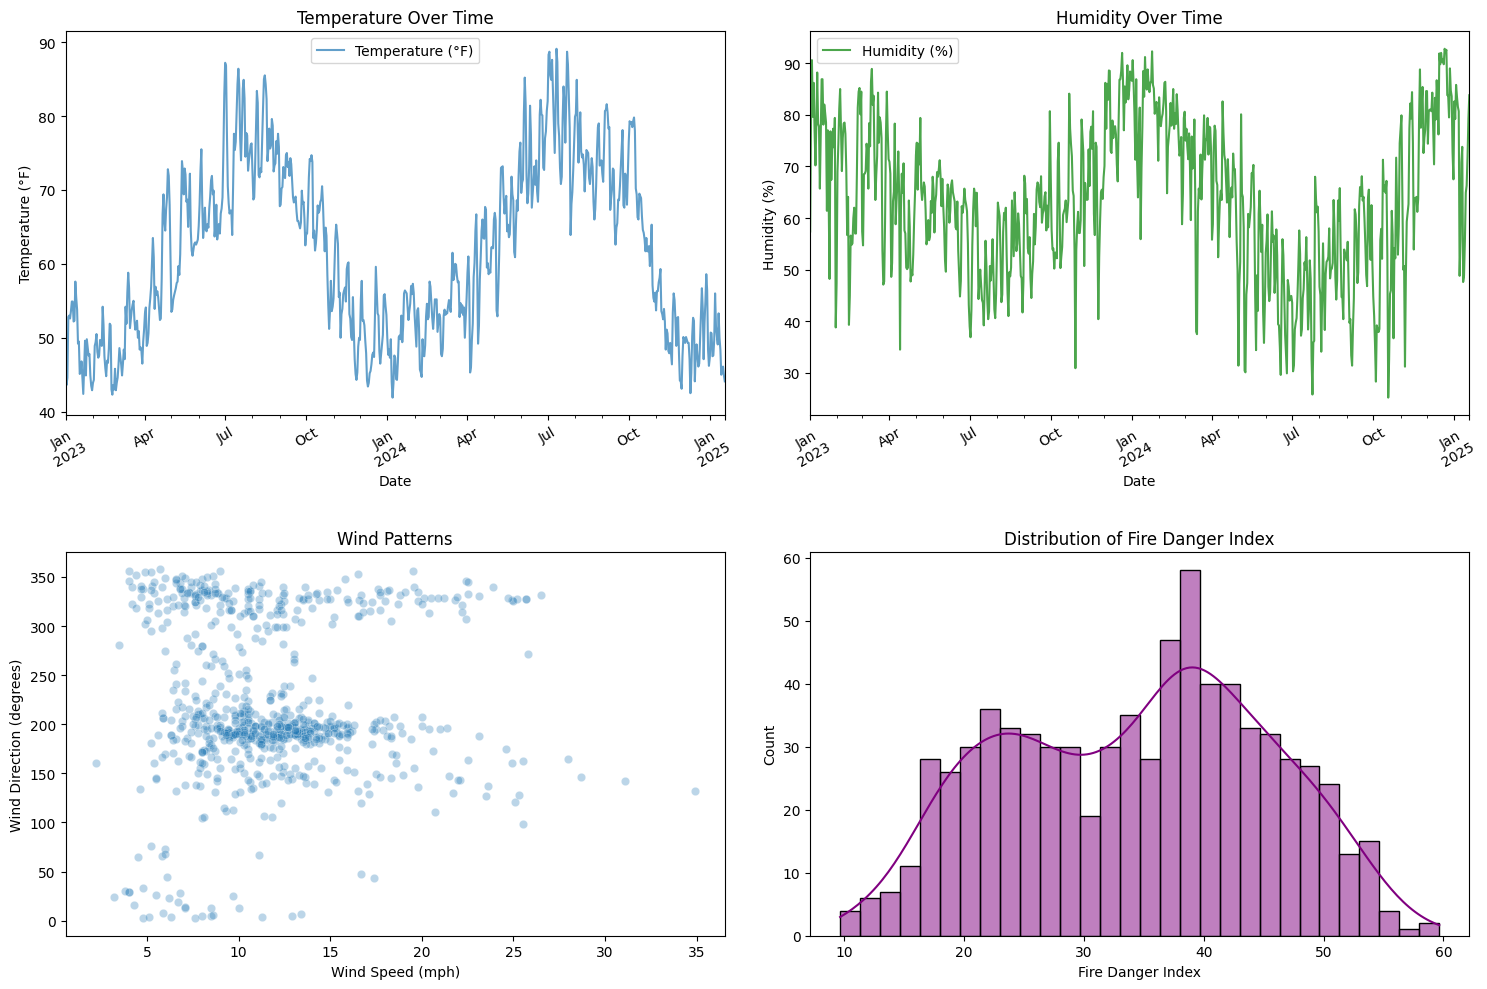

In [25]:
plt.figure(figsize=(15, 10))

# Temperature Trend
ax1 = plt.subplot(2, 2, 1)
weather_data.plot(x='datetime', y='temp', alpha=0.7, ax=ax1, label='Temperature (°F)')
ax1.set_title('Temperature Over Time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (°F)')
ax1.legend()
plt.xticks(rotation=30)

# Humidity Trend
ax2 = plt.subplot(2, 2, 2)
weather_data.plot(x='datetime', y='humidity', alpha=0.7, ax=ax2, label='Humidity (%)', color='green')
ax2.set_title('Humidity Over Time')
ax2.set_xlabel('Date')
ax2.set_ylabel('Humidity (%)')
ax2.legend()
plt.xticks(rotation=30)

# Wind Patterns
ax3 = plt.subplot(2, 2, 3)
sns.scatterplot(data=weather_data, x='windspeed', y='winddir', alpha=0.3, ax=ax3)
ax3.set_title('Wind Patterns')
ax3.set_xlabel('Wind Speed (mph)')
ax3.set_ylabel('Wind Direction (degrees)')

# Fire Danger Index Distribution
ax4 = plt.subplot(2, 2, 4)
sns.histplot(data=weather_data, x='fire_danger_index', bins=30, kde=True, color='purple', ax=ax4)
ax4.set_title('Distribution of Fire Danger Index')
ax4.set_xlabel('Fire Danger Index')
ax4.set_ylabel('Count')

# Adjust spacing
plt.tight_layout(h_pad=3, w_pad=2)
plt.show()


In [26]:
print("\nWeather Statistics:")
print(weather_data[weather_features + ['fire_danger_index']].describe())


Weather Statistics:
             temp    humidity   windspeed     winddir      precip  cloudcover  \
count  749.000000  749.000000  749.000000  749.000000  749.000000  749.000000   
mean    61.507744   63.392657   11.740187  220.722430    0.048750   22.820027   
std     11.592395   14.637138    4.671950   79.641281    0.153764   29.719693   
min     41.900000   25.200000    2.200000    2.400000    0.000000    0.000000   
25%     51.800000   52.700000    8.400000  183.700000    0.000000    1.400000   
50%     60.200000   63.500000   11.100000  198.000000    0.000000    7.400000   
75%     71.000000   75.500000   13.800000  307.200000    0.000000   39.600000   
max     89.100000   92.800000   34.900000  357.600000    1.722000   99.900000   

          uvindex  fire_danger_index  
count  749.000000         749.000000  
mean     4.156208          34.325564  
std      3.330848          10.917445  
min      0.000000           9.690000  
25%      1.000000          24.950000  
50%      4.0000

In [27]:
# Train Prophet model for weather forecasting
weather_forecast_data = weather_data[['datetime', 'fire_danger_index']]
weather_forecast_data.columns = ['ds', 'y']

weather_model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True
)
weather_model.fit(weather_forecast_data)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpgr18m6x8/_biq3yxg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgr18m6x8/jt79vobe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92516', 'data', 'file=/tmp/tmpgr18m6x8/_biq3yxg.json', 'init=/tmp/tmpgr18m6x8/jt79vobe.json', 'output', 'file=/tmp/tmpgr18m6x8/prophet_modelhtb50pfi/prophet_model-20250118115026.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:50:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:50:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [29]:
# Predict weather conditions
days_ahead = 7
future_dates = weather_model.make_future_dataframe(
    periods=days_ahead * 24,
    freq='H'
)
forecast = weather_model.predict(future_dates)
forecast.head(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-01-01,38.003897,14.003104,29.746937,38.003897,38.003897,-16.164877,-16.164877,-16.164877,-2.293175,...,-0.174894,-0.174894,-0.174894,-13.696809,-13.696809,-13.696809,0.0,0.0,0.0,21.839020
1,2023-01-02,37.985376,14.375938,30.615866,37.985376,37.985376,-15.357693,-15.357693,-15.357693,-2.293175,...,0.277505,0.277505,0.277505,-13.342022,-13.342022,-13.342022,0.0,0.0,0.0,22.627683
2,2023-01-03,37.966854,15.054597,31.105539,37.966854,37.966854,-15.114046,-15.114046,-15.114046,-2.293175,...,0.182296,0.182296,0.182296,-13.003167,-13.003167,-13.003167,0.0,0.0,0.0,22.852808
3,2023-01-04,37.948332,15.002116,31.615371,37.948332,37.948332,-14.723665,-14.723665,-14.723665,-2.293175,...,0.253807,0.253807,0.253807,-12.684296,-12.684296,-12.684296,0.0,0.0,0.0,23.224667
4,2023-01-05,37.929810,15.684511,31.865401,37.929810,37.929810,-14.341992,-14.341992,-14.341992,-2.293175,...,0.339939,0.339939,0.339939,-12.388755,-12.388755,-12.388755,0.0,0.0,0.0,23.587818


<Figure size 1500x600 with 0 Axes>

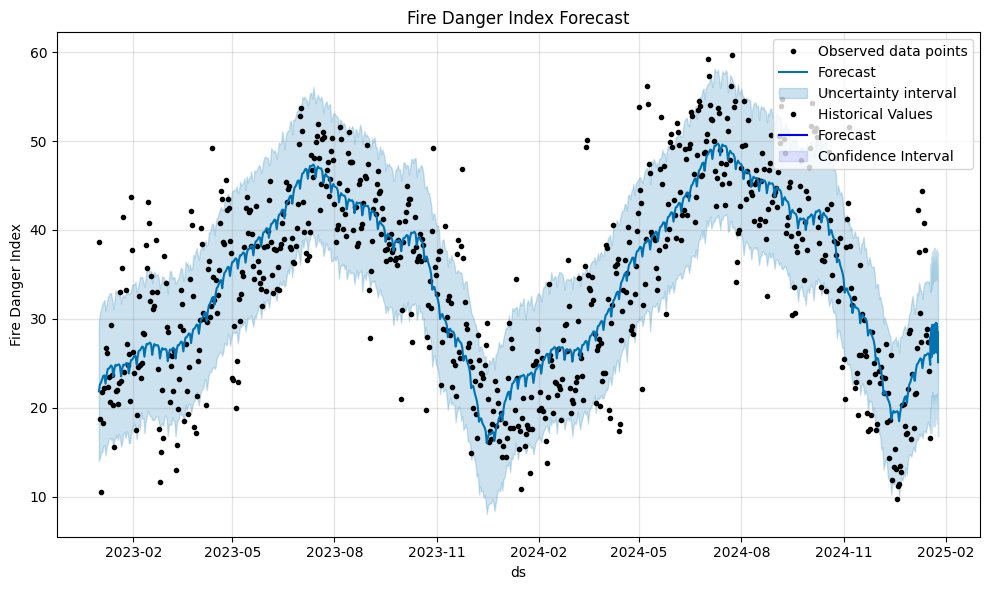

In [31]:
# Plot forecast
plt.figure(figsize=(15, 6))
weather_model.plot(forecast)
plt.title('Fire Danger Index Forecast')

# Add legends
plt.plot([], [], 'k.', label='Historical Values')
plt.plot([], [], 'b-', label='Forecast')
plt.fill_between([], [], [], color='b', alpha=0.1, label='Confidence Interval')

plt.legend(loc='upper right')
plt.ylabel('Fire Danger Index')
plt.tight_layout()
plt.show()

In [37]:
# Prepare data for spread model
print("\nPreparing Fire Spread Model Data...")
geo_data['poly_DateCurrent'] = geo_data['poly_DateCurrent'].astype('datetime64[ns]')
weather_data['datetime'] = weather_data['datetime'].astype('datetime64[ns]')

# Handle null values and merge data
geo_data = geo_data.dropna(subset=['poly_DateCurrent'])
combined_data = pd.merge_asof(
    geo_data.sort_values('poly_DateCurrent'),
    weather_data.sort_values('datetime'),
    left_on='poly_DateCurrent',
    right_on='datetime',
    direction='backward'
)

# Drop rows with NaN values
combined_data = combined_data.dropna(subset=['area_acres'] + ['temp', 'humidity', 'windspeed', 'winddir', 'cloudcover', 'fire_danger_index'])

# Prepare features for spread model
features = ['temp', 'humidity', 'windspeed', 'winddir', 'cloudcover', 'fire_danger_index']
X = combined_data[features]
y = combined_data['area_acres']

# Split data for validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data preparation complete.")


Preparing Fire Spread Model Data...
Data preparation complete.


In [56]:
X_train = X_train.drop(columns=['wind_interaction'])
X_test = X_test.drop(columns=['wind_interaction'])

In [58]:
# Train XGBoost model
print("\nTraining Fire Spread Model...")
spread_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    max_depth=6
)
spread_model.fit(X_train, y_train) # This line fits the model to the data
# Now that the model is fitted, you can get the representation if needed
print(spread_model)


Training Fire Spread Model...
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [59]:
# Model Evaluation
print("\nEvaluating Model Performance...")
y_pred = spread_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("\nModel Performance Metrics:")
print(f"Root Mean Square Error: {rmse:.2f} acres")
print(f"Mean Absolute Error: {mae:.2f} acres")
print(f"R-squared Score: {r2:.3f}")


Evaluating Model Performance...

Model Performance Metrics:
Root Mean Square Error: 70489.51 acres
Mean Absolute Error: 26944.86 acres
R-squared Score: 0.122


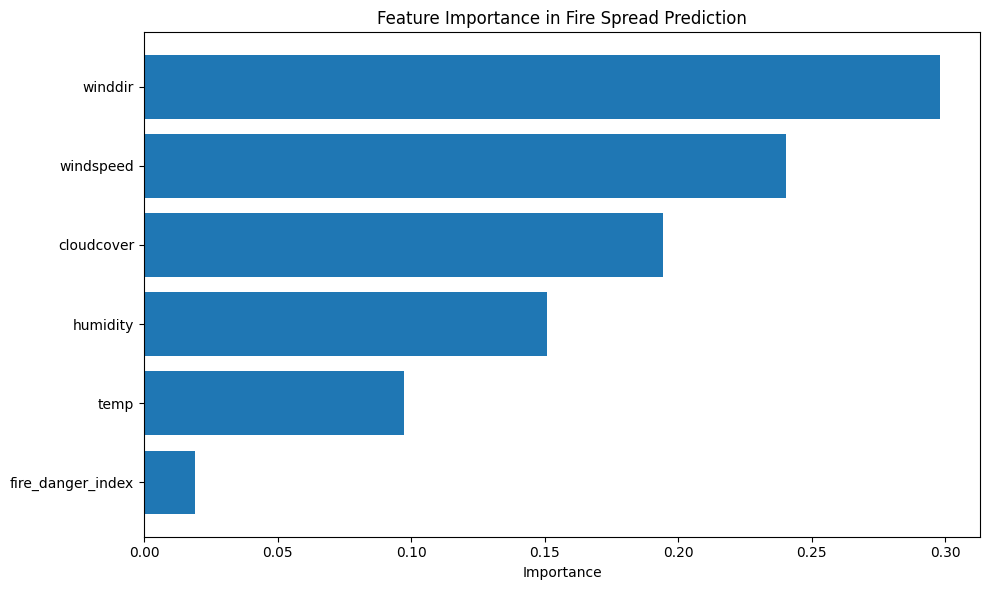

In [60]:
# Feature importance plot
plt.figure(figsize=(10, 6))
# Get feature names from the training data (including interaction term)
features = X_train.columns.tolist()
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': spread_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=True)

plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.title('Feature Importance in Fire Spread Prediction')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()



Calculating Fire Spread...

Example Predictions for Different Weather Conditions:

Scenario 1:
Temperature: 75°F
Humidity: 30%
Wind Speed: 10 mph
Fire Danger Index: 50
Predicted Area: 262.72 acres

Scenario 2:
Temperature: 85°F
Humidity: 20%
Wind Speed: 20 mph
Fire Danger Index: 70
Predicted Area: 9411.48 acres

Scenario 3:
Temperature: 95°F
Humidity: 10%
Wind Speed: 30 mph
Fire Danger Index: 90
Predicted Area: 94554.16 acres

Creating Visualization Map...

Saving Results...


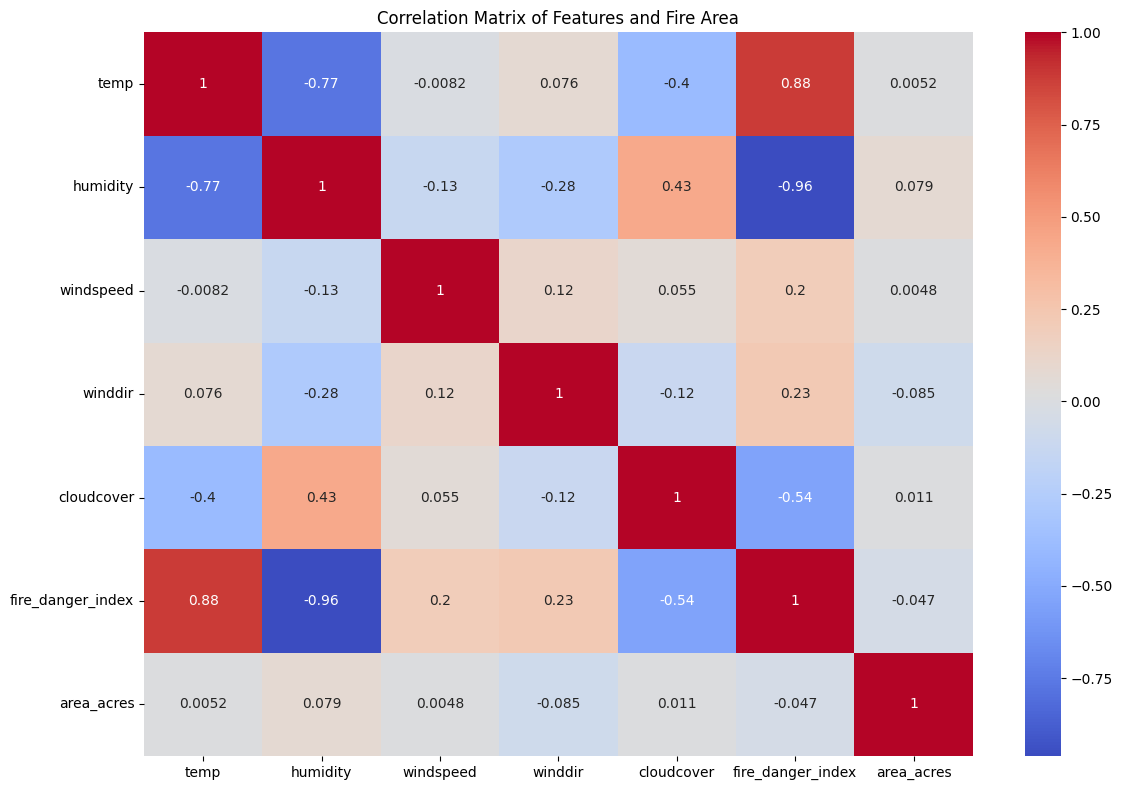


Analysis Complete! Check the generated visualizations and weather_enhanced_fire_prediction.html for the interactive map.


In [61]:
def create_directional_spread(geometry, distance, wind_direction):
    """Create elliptical spread based on wind direction"""
    if isinstance(geometry, MultiPolygon):
        polygons = list(geometry.geoms)
    else:
        polygons = [geometry]

    spread_polygons = []
    for poly in polygons:
        center = poly.centroid
        angles = np.linspace(0, 360, 64)
        coords = []

        for angle in angles:
            angle_diff = abs(angle - wind_direction)
            if angle_diff > 180:
                angle_diff = 360 - angle_diff

            adjusted_distance = distance * (1 - 0.5 * (angle_diff / 180))

            rad = np.radians(angle)
            x = center.x + adjusted_distance * np.cos(rad)
            y = center.y + adjusted_distance * np.sin(rad)
            coords.append((x, y))

        spread_polygons.append(Polygon(coords))

    return unary_union(spread_polygons)

# Fire Spread Prediction
print("\nCalculating Fire Spread...")
current_geometry = geo_data.iloc[-1].geometry
hours_ahead = 24

# Get weather conditions for prediction period
weather_conditions = forecast[forecast['ds'] <=
    (pd.Timestamp.now() + pd.Timedelta(hours=hours_ahead))]

# Calculate average fire danger index and adjust spread
avg_danger_index = weather_conditions['yhat'].mean()
base_spread = current_geometry.area
weather_multiplier = 1 + (avg_danger_index / 100)
spread_distance = np.sqrt(base_spread * weather_multiplier) - np.sqrt(base_spread)

# Adjust for wind
wind_direction = weather_data['winddir'].iloc[-1]
wind_speed = weather_data['windspeed'].iloc[-1]
wind_multiplier = 1 + (wind_speed / 50)
spread_distance *= wind_multiplier

# Calculate predicted spread
predicted_spread = create_directional_spread(
    current_geometry,
    spread_distance,
    wind_direction
)

# Example predictions for different scenarios
print("\nExample Predictions for Different Weather Conditions:")
example_conditions = pd.DataFrame({
    'temp': [75, 85, 95],
    'humidity': [30, 20, 10],
    'windspeed': [10, 20, 30],
    'winddir': [180, 270, 90],
    'cloudcover': [20, 10, 0],
    'fire_danger_index': [50, 70, 90]
})

predictions = spread_model.predict(example_conditions)
for i, (_, condition) in enumerate(example_conditions.iterrows()):
    print(f"\nScenario {i+1}:")
    print(f"Temperature: {condition['temp']}°F")
    print(f"Humidity: {condition['humidity']}%")
    print(f"Wind Speed: {condition['windspeed']} mph")
    print(f"Fire Danger Index: {condition['fire_danger_index']}")
    print(f"Predicted Area: {predictions[i]:.2f} acres")

# Create visualization
print("\nCreating Visualization Map...")
center = [current_geometry.centroid.y, current_geometry.centroid.x]
m = folium.Map(location=center, zoom_start=12, tiles='CartoDB positron')

# Add current fire perimeter
folium.GeoJson(
    current_geometry.__geo_interface__,
    name='Current Fire Perimeter',
    style_function=lambda x: {
        'fillColor': 'red',
        'color': 'red',
        'weight': 2,
        'fillOpacity': 0.5
    }
).add_to(m)

# Add predicted spread
folium.GeoJson(
    predicted_spread.__geo_interface__,
    name='Predicted Spread (Weather Enhanced)',
    style_function=lambda x: {
        'fillColor': 'orange',
        'color': 'orange',
        'weight': 2,
        'fillOpacity': 0.3
    }
).add_to(m)

# Add weather information
latest_weather = weather_data.iloc[-1]
weather_html = f"""
<div style="position: fixed; top: 50px; right: 50px; z-index: 1000;
            background-color: white; padding: 10px; border-radius: 5px;
            border: 2px solid grey;">
    <h4>Current Weather Conditions</h4>
    <p>Temperature: {latest_weather['temp']}°F</p>
    <p>Humidity: {latest_weather['humidity']}%</p>
    <p>Wind Speed: {latest_weather['windspeed']} mph</p>
    <p>Wind Direction: {latest_weather['winddir']}°</p>
    <p>Fire Danger Index: {latest_weather['fire_danger_index']:.1f}</p>
</div>
"""
m.get_root().html.add_child(folium.Element(weather_html))

# Add legend
legend_html = '''
<div style="position: fixed; bottom: 50px; left: 50px; z-index: 1000;
            background-color: white; padding: 10px; border-radius: 5px;
            border: 2px solid grey;">
    <p><span style="color: red;">■</span> Current Fire Perimeter</p>
    <p><span style="color: orange;">■</span> Predicted Spread (24h)</p>
</div>
'''
m.get_root().html.add_child(folium.Element(legend_html))

# Add layer control
folium.LayerControl().add_to(m)

# Save final results
print("\nSaving Results...")
m.save('weather_enhanced_fire_prediction.html')

# Final correlation analysis
plt.figure(figsize=(12, 8))
sns.heatmap(combined_data[features + ['area_acres']].corr(),
            annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features and Fire Area')
plt.tight_layout()
plt.show()

print("\nAnalysis Complete! Check the generated visualizations and weather_enhanced_fire_prediction.html for the interactive map.")

In [24]:
import pandas as pd
import geopandas as gpd
import numpy as np
from shapely.geometry import Polygon, MultiPolygon, Point, box
from shapely.ops import unary_union
import folium
from folium import plugins
import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from prophet import Prophet
import xgboost as xgb
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import plotly.express as px
import plotly.graph_objects as go
warnings.filterwarnings('ignore')

class EnhancedFirePredictor:
    def __init__(self, csv_path, geojson_path, weather_path):
        self.csv_data = pd.read_csv(csv_path)
        self.geo_data = gpd.read_file(geojson_path)
        self.weather_data = pd.read_csv(weather_path)
        self.current_perimeter = None
        self.predicted_spread = None
        self.weather_model = None
        self.spread_model = None
        self.weather_forecast_history = None
        self.spread_forecast_history = None

    def preprocess_data(self):
        """Enhanced preprocessing with temporal features"""
        # Original preprocessing
        date_cols = ['poly_DateCurrent', 'FireDiscoveryDate', 'CreationDate', 'EditDate']
        for col in date_cols:
            self.csv_data[col] = pd.to_datetime(self.csv_data[col], infer_datetime_format=True, errors='coerce')

        self.geo_data['poly_DateCurrent'] = pd.to_datetime(self.geo_data['poly_DateCurrent']).dt.tz_localize(None)
        self.weather_data['datetime'] = pd.to_datetime(self.weather_data['datetime']).dt.tz_localize(None)

        # Add temporal features
        self.weather_data['hour'] = self.weather_data['datetime'].dt.hour
        self.weather_data['day_of_week'] = self.weather_data['datetime'].dt.dayofweek
        self.weather_data['month'] = self.weather_data['datetime'].dt.month
        self.weather_data['season'] = pd.cut(self.weather_data['datetime'].dt.month,
                                           bins=[0, 3, 6, 9, 12],
                                           labels=['Winter', 'Spring', 'Summer', 'Fall'])

        # Enhanced fire danger index with seasonal adjustments
        season_weights = {
            'Winter': 0.7,
            'Spring': 0.9,
            'Summer': 1.2,
            'Fall': 1.0
        }

        base_fire_danger = (
            self.weather_data['temp'] * 0.3 +
            (100 - self.weather_data['humidity']) * 0.4 +
            self.weather_data['windspeed'] * 0.3
        )

        self.weather_data['fire_danger_index'] = base_fire_danger * \
          self.weather_data['season'].map(season_weights).astype(float)

        # Add lagged features
        for lag in [1, 3, 6, 12, 24]:  # hours
            self.weather_data[f'temp_lag_{lag}'] = self.weather_data['temp'].shift(lag)
            self.weather_data[f'humidity_lag_{lag}'] = self.weather_data['humidity'].shift(lag)
            self.weather_data[f'windspeed_lag_{lag}'] = self.weather_data['windspeed'].shift(lag)
            self.weather_data[f'fire_danger_lag_{lag}'] = self.weather_data['fire_danger_index'].shift(lag)

        # Calculate rolling means
        for window in [3, 6, 12, 24]:  # hours
            self.weather_data[f'temp_rolling_{window}'] = self.weather_data['temp'].rolling(window).mean()
            self.weather_data[f'humidity_rolling_{window}'] = self.weather_data['humidity'].rolling(window).mean()
            self.weather_data[f'windspeed_rolling_{window}'] = self.weather_data['windspeed'].rolling(window).mean()
            self.weather_data[f'fire_danger_rolling_{window}'] = self.weather_data['fire_danger_index'].rolling(window).mean()

        # Drop rows with NaN values from the new features
        self.weather_data = self.weather_data.dropna()

    def train_weather_forecast(self):
        """Enhanced Prophet model with additional regressors"""
        # Prepare data for Prophet
        weather_forecast_data = self.weather_data[['datetime', 'fire_danger_index']].copy()
        weather_forecast_data.columns = ['ds', 'y']

        # Add additional regressors
        for col in ['temp', 'humidity', 'windspeed', 'cloudcover']:
            weather_forecast_data[col] = self.weather_data[col]

        # Initialize Prophet with more parameters
        self.weather_model = Prophet(
            yearly_seasonality=20,
            weekly_seasonality=True,
            daily_seasonality=True,
            changepoint_prior_scale=0.05,
            seasonality_prior_scale=10.0,
            holidays_prior_scale=10.0
        )

        # Add the regressors
        for col in ['temp', 'humidity', 'windspeed', 'cloudcover']:
            self.weather_model.add_regressor(col)

        # Split data for validation
        train_size = int(len(weather_forecast_data) * 0.8)
        train_data = weather_forecast_data.iloc[:train_size]
        self.validation_data = weather_forecast_data.iloc[train_size:]

        # Fit the model
        self.weather_model.fit(train_data)

        # Make predictions for validation
        validation_forecast = self.weather_model.predict(self.validation_data)
        self.weather_forecast_history = {
            'actual': self.validation_data['y'].values,
            'predicted': validation_forecast['yhat'].values,
            'dates': self.validation_data['ds'].values
        }

    def predict_weather(self, days_ahead=7):
            """Predicts weather conditions using the trained Prophet model."""
            future_dates = self.weather_model.make_future_dataframe(
                periods=days_ahead * 24,  # Forecast for the next 7 days
                freq='H'  # Hourly frequency
            )

            # Include additional regressors in the future dataframe
            for col in ['temp', 'humidity', 'windspeed', 'cloudcover']:
                # Get the last 'days_ahead * 24' values from weather_data
                regressor_values = self.weather_data[col].iloc[-days_ahead * 24:].values

                # Pad or truncate to match the length of future_dates
                if len(regressor_values) < len(future_dates):
                    # Pad with the last value if shorter
                    regressor_values = np.pad(regressor_values, (0, len(future_dates) - len(regressor_values)), 'edge')
                else:
                    # Truncate to the length of future_dates if longer
                    regressor_values = regressor_values[:len(future_dates)]

                future_dates[col] = regressor_values  # Assign the padded/truncated values


            forecast = self.weather_model.predict(future_dates)
            return forecast

    def plot_weather_forecast_performance(self):
        """Generate plots for weather forecast performance"""
        # Create time series plot
        fig = go.Figure()

        # Add actual values
        fig.add_trace(go.Scatter(
            x=self.weather_forecast_history['dates'],
            y=self.weather_forecast_history['actual'],
            name='Actual',
            line=dict(color='blue')
        ))

        # Add predicted values
        fig.add_trace(go.Scatter(
            x=self.weather_forecast_history['dates'],
            y=self.weather_forecast_history['predicted'],
            name='Predicted',
            line=dict(color='red')
        ))

        fig.update_layout(
            title='Weather Forecast: Predicted vs Actual Fire Danger Index',
            xaxis_title='Date',
            yaxis_title='Fire Danger Index',
            showlegend=True
        )

        # Calculate metrics
        mse = mean_squared_error(
            self.weather_forecast_history['actual'],
            self.weather_forecast_history['predicted']
        )
        rmse = np.sqrt(mse)
        r2 = r2_score(
            self.weather_forecast_history['actual'],
            self.weather_forecast_history['predicted']
        )

        # Create scatter plot
        scatter_fig = px.scatter(
            x=self.weather_forecast_history['actual'],
            y=self.weather_forecast_history['predicted'],
            labels={'x': 'Actual Fire Danger Index', 'y': 'Predicted Fire Danger Index'},
            title=f'Prediction Accuracy (R² = {r2:.3f}, RMSE = {rmse:.3f})'
        )

        # Add perfect prediction line
        scatter_fig.add_trace(
            go.Scatter(
                x=[min(self.weather_forecast_history['actual']),
                   max(self.weather_forecast_history['actual'])],
                y=[min(self.weather_forecast_history['actual']),
                   max(self.weather_forecast_history['actual'])],
                mode='lines',
                name='Perfect Prediction',
                line=dict(color='green', dash='dash')
            )
        )

        return fig, scatter_fig

    def train_spread_model(self):
        """Enhanced spread model with temporal features"""
        # Convert to same datetime format
        self.geo_data['poly_DateCurrent'] = self.geo_data['poly_DateCurrent'].astype('datetime64[ns]')
        self.weather_data['datetime'] = self.weather_data['datetime'].astype('datetime64[ns]')

        # Handle null values and merge data
        self.geo_data = self.geo_data.dropna(subset=['poly_DateCurrent'])
        combined_data = pd.merge_asof(
            self.geo_data.sort_values('poly_DateCurrent'),
            self.weather_data.sort_values('datetime'),
            left_on='poly_DateCurrent',
            right_on='datetime',
            direction='backward'
        )

        # Enhanced feature set
        features = [
            'temp', 'humidity', 'windspeed', 'winddir', 'cloudcover', 'fire_danger_index',
            'hour', 'day_of_week', 'month',
            'temp_rolling_24', 'humidity_rolling_24', 'windspeed_rolling_24', 'fire_danger_rolling_24'
        ]

        # Prepare data
        X = combined_data[features]
        y = combined_data['area_acres']

        mask = np.isfinite(y)
        X = X[mask]
        y = y[mask]

        X = X[y > 0]
        y = y[y > 0]
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train XGBoost with more parameters
        self.spread_model = xgb.XGBRegressor(
            objective='reg:squarederror',
            n_estimators=200,
            max_depth=8,
            learning_rate=0.05,
            subsample=0.8,
            colsample_bytree=0.8,
            min_child_weight=3
        )

        # Fit model and store predictions
        self.spread_model.fit(X_train, y_train)
        y_pred = self.spread_model.predict(X_test)

        self.spread_forecast_history = {
            'actual': y_test,
            'predicted': y_pred,
            'features': X_test
        }

    def plot_spread_model_performance(self):
        """Generate plots for spread model performance"""
        # Calculate metrics
        mse = mean_squared_error(
            self.spread_forecast_history['actual'],
            self.spread_forecast_history['predicted']
        )
        rmse = np.sqrt(mse)
        r2 = r2_score(
            self.spread_forecast_history['actual'],
            self.spread_forecast_history['predicted']
        )

        # Create scatter plot
        fig = px.scatter(
            x=self.spread_forecast_history['actual'],
            y=self.spread_forecast_history['predicted'],
            labels={'x': 'Actual Area (acres)', 'y': 'Predicted Area (acres)'},
            title=f'Fire Spread Prediction Accuracy (R² = {r2:.3f}, RMSE = {rmse:.3f})'
        )

        # Add perfect prediction line
        fig.add_trace(
            go.Scatter(
                x=[min(self.spread_forecast_history['actual']),
                   max(self.spread_forecast_history['actual'])],
                y=[min(self.spread_forecast_history['actual']),
                   max(self.spread_forecast_history['actual'])],
                mode='lines',
                name='Perfect Prediction',
                line=dict(color='green', dash='dash')
            )
        )

        # Feature importance plot
        importance_fig = px.bar(
            x=self.spread_model.feature_importances_,
            y=self.spread_forecast_history['features'].columns,
            orientation='h',
            title='Feature Importance in Fire Spread Prediction'
        )

        return fig, importance_fig

    def predict_spread(self, current_geometry, weather_forecast, hours_ahead=24):
        """Predict fire spread based on current perimeter and weather forecast"""
        # Get weather conditions for prediction period
        weather_conditions = weather_forecast[weather_forecast['ds'] <=
            (pd.Timestamp.now() + pd.Timedelta(hours=hours_ahead))]

        # Calculate average fire danger index for the period
        avg_danger_index = weather_conditions['yhat'].mean()

        # Adjust spread based on weather conditions
        base_spread = current_geometry.area
        weather_multiplier = 1 + (avg_danger_index / 100)

        # Calculate spread distance
        spread_distance = np.sqrt(base_spread * weather_multiplier) - np.sqrt(base_spread)

        # Create directional spread based on wind
        wind_direction = self.weather_data['winddir'].iloc[-1]
        wind_speed = self.weather_data['windspeed'].iloc[-1]

        # Adjust spread distance by wind speed
        wind_multiplier = 1 + (wind_speed / 50)
        spread_distance *= wind_multiplier

        # Create elliptical spread based on wind direction
        self.current_perimeter = current_geometry
        self.predicted_spread = self.create_directional_spread(
            current_geometry,
            spread_distance,
            wind_direction
        )

        return self.predicted_spread

    def create_directional_spread(self, geometry, distance, wind_direction):
        """Create elliptical spread based on wind direction"""
        if isinstance(geometry, MultiPolygon):
            polygons = list(geometry.geoms)
        else:
            polygons = [geometry]

        # Create elliptical buffer for each polygon
        spread_polygons = []
        for poly in polygons:
            # Create elliptical buffer
            center = poly.centroid
            angles = np.linspace(0, 360, 64)
            coords = []

            for angle in angles:
                # Adjust distance based on wind direction
                angle_diff = abs(angle - wind_direction)
                if angle_diff > 180:
                    angle_diff = 360 - angle_diff

                # Reduce spread against the wind
                adjusted_distance = distance * (1 - 0.5 * (angle_diff / 180))

                # Calculate point
                rad = np.radians(angle)
                x = center.x + adjusted_distance * np.cos(rad)
                y = center.y + adjusted_distance * np.sin(rad)
                coords.append((x, y))

            # Create and add polygon
            spread_polygons.append(Polygon(coords))

        return unary_union(spread_polygons)

    def create_visualization(self, center=None):
        """Create an interactive map with weather-enhanced fire spread prediction"""
        if center is None:
            center = [
                self.current_perimeter.centroid.y,
                self.current_perimeter.centroid.x
            ]

        m = folium.Map(location=center, zoom_start=12,
                      tiles='CartoDB positron')

        # Add current fire perimeter
        folium.GeoJson(
            self.current_perimeter.__geo_interface__,
            name='Current Fire Perimeter',
            style_function=lambda x: {
                'fillColor': 'red',
                'color': 'red',
                'weight': 2,
                'fillOpacity': 0.5
            }
        ).add_to(m)

        # Add predicted spread
        folium.GeoJson(
            self.predicted_spread.__geo_interface__,
            name='Predicted Spread (Weather Enhanced)',
            style_function=lambda x: {
                'fillColor': 'orange',
                'color': 'orange',
                'weight': 2,
                'fillOpacity': 0.3
            }
        ).add_to(m)

        # Add weather information
        latest_weather = self.weather_data.iloc[-1]
        weather_html = f"""
        <div style="position: fixed; top: 50px; right: 50px; z-index: 1000;
                    background-color: white; padding: 10px; border-radius: 5px;
                    border: 2px solid grey;">
            <h4>Current Weather Conditions</h4>
            <p>Temperature: {latest_weather['temp']}°F</p>
            <p>Humidity: {latest_weather['humidity']}%</p>
            <p>Wind Speed: {latest_weather['windspeed']} mph</p>
            <p>Wind Direction: {latest_weather['winddir']}°</p>
            <p>Fire Danger Index: {latest_weather['fire_danger_index']:.1f}</p>
        </div>
        """
        m.get_root().html.add_child(folium.Element(weather_html))

        # Add legend
        legend_html = '''
        <div style="position: fixed; bottom: 50px; left: 50px; z-index: 1000;
                    background-color: white; padding: 10px; border-radius: 5px;
                    border: 2px solid grey;">
            <p><span style="color: red;">■</span> Current Fire Perimeter</p>
            <p><span style="color: orange;">■</span> Predicted Spread (24h)</p>
        </div>
        '''
        m.get_root().html.add_child(folium.Element(legend_html))

        # Add layer control
        folium.LayerControl().add_to(m)

        return m

def main():
    # Initialize predictor
    predictor = EnhancedFirePredictor(
        '/content/CA_Perimeters_NIFC_FIRIS_public_view.csv',
        '/content/CA_Perimeters_NIFC_FIRIS_public_view.geojson',
        '/content/california 2023-01-01 to 2025-01-18.csv'
    )

    # Preprocess and train
    predictor.preprocess_data()
    predictor.train_weather_forecast()
    predictor.train_spread_model()

    # Generate performance plots
    weather_ts_plot, weather_scatter_plot = predictor.plot_weather_forecast_performance()
    spread_scatter_plot, feature_importance_plot = predictor.plot_spread_model_performance()

    # Save plots
    weather_ts_plot.write_html('weather_forecast_performance.html')
    weather_scatter_plot.write_html('weather_prediction_accuracy.html')
    spread_scatter_plot.write_html('spread_prediction_accuracy.html')
    feature_importance_plot.write_html('feature_importance.html')

    # Get predictions and create visualization
    forecast = predictor.predict_weather()
    latest_geometry = predictor.geo_data.iloc[-1].geometry
    predicted_spread = predictor.predict_spread(latest_geometry, forecast)
    map_viz = predictor.create_visualization()
    map_viz.save('weather_enhanced_fire_prediction.html')

    return predictor

if __name__ == "__main__":
    predictor = main()

DEBUG:cmdstanpy:input tempfile: /tmp/tmp2mtais2r/lfeqw18g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2mtais2r/nij4gk25.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66679', 'data', 'file=/tmp/tmp2mtais2r/lfeqw18g.json', 'init=/tmp/tmp2mtais2r/nij4gk25.json', 'output', 'file=/tmp/tmp2mtais2r/prophet_modelijeqo94r/prophet_model-20250118145358.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:53:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:53:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
